# Лабораторная работа №1: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 2381 Ахметгареев Карим Ильгизович и Самулевич Степан Александрович. Вариант №1.

## Цель работы

Изучить математическое описание стандартных дискретных сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

Частота дискретизации:

$ f_d = \frac{1}{T} $

Единичный цифровой импульс:

$ \delta_d(k) =
\begin{cases}
1, & k = 0, \\
0, & k \neq 0,
\end{cases}
\quad k \in \mathbb{Z} $

Дельта-функция (функция Дирака):

$ \delta(t) =
\begin{cases}
\infty, & t = 0, \\
0, & t \neq 0.
\end{cases} $

Дискретный единичный скачок:

$ \sigma_d(k) =
\begin{cases}
1, & k \geq 0, \\
0, & k < 0,
\end{cases}
\quad k \in \mathbb{Z} $

Функция единичного скачка (функция Хевисайда):

$ \sigma(t) =
\begin{cases}
1, & t > 0, \\
\frac{1}{2} \ или \ не \ определена, & t = 0, \\
0, & t < 0.
\end{cases} $

Дискретная экспоненциальная функция:

$ s_1(k) =
\begin{cases}
0, & k < 0, \\
a^k, & k \geq 0,
\end{cases}
\quad k \in \mathbb{Z} $

Дискретный комплексный гармонический сигнал:

$ s_2(k) = C \exp\!\big(j \omega_0 k \big) $


## Постановка задачи

С помощью программных средств провести моделирование и анализ стандартных дискретных последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

Пункты работы выполняется с помощью кода.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Параметры по варианту
# ---------------------------
Nb = 1
N = 30 + Nb % 5
T = 0.0005 * (1 + Nb % 3)
a = (-1) ** Nb * (0.8 + 0.005 * (Nb % 20))
omega0 = np.pi / (6 + Nb % 5)
C = 1 + Nb % 5
m = 5 + Nb % 5

k = np.arange(N)
t = k * T

# ---------------------------
# Сигналы
# ---------------------------
delta = np.zeros(N); delta[0] = 1                  # единичный импульс
step = np.ones(N)                                  # единичный скачок
s1 = a ** k                                        # дискретная экспонента
s2 = C * np.exp(1j * omega0 * k)                   # комплексный гармонический сигнал
s2_real = np.real(s2)
s2_imag = np.imag(s2)

# ---------------------------
# Функции построения графиков
# ---------------------------
def center_axis(x_axis):
    margin = 0.5 * (x_axis[1] - x_axis[0])
    left = x_axis.min()
    right = x_axis.max()
    left = -abs(right)
    return left - margin, right + margin

def plot_bar(x, title, x_axis, xlabel):
    plt.figure()
    bar_width = (x_axis[1] - x_axis[0]) * 0.8
    plt.bar(x_axis, x, width=bar_width)
    xmin, xmax = center_axis(x_axis)
    plt.xlim(xmin, xmax)
    plt.axhline(0, color="black")
    plt.axvline(0, color="black")
    plt.title(title)
    plt.xlabel(xlabel); plt.ylabel("Amplitude")
    plt.grid(True)


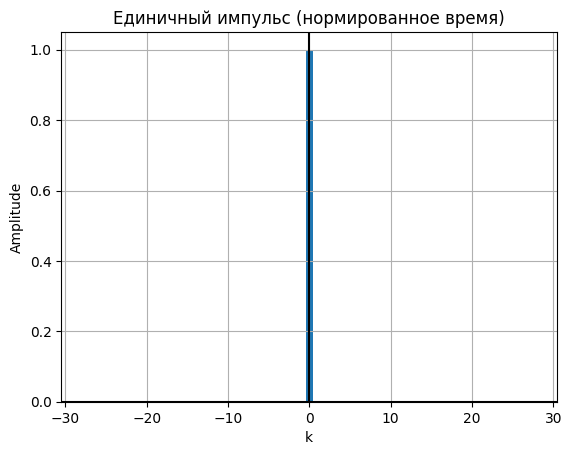

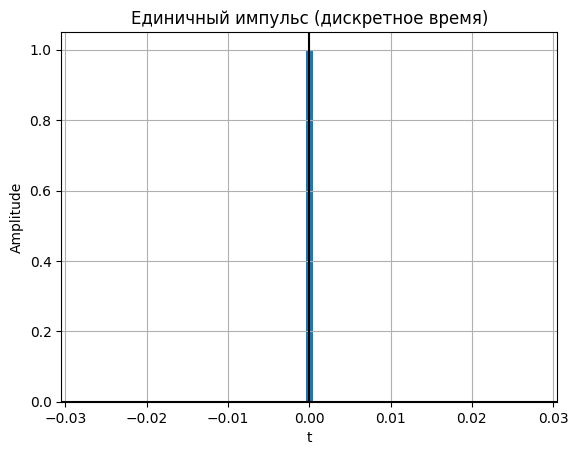

1) Связь времени:
 - Нормированное время: k = 0..N-1 (индексы отсчетов).
 - Дискретное время: t = k*T, где T = 0.001 с.
 Таким образом, одно и то же значение сигнала можно описывать через индекс k или через реальное время t = kT.

Единичный цифровой импульс δ_d[k] = 1 при k=0, и 0 иначе.
Он дискретный, в отличие от дельта-функции Дирака δ(t), которая непрерывна, бесконечно узка и имеет интеграл = 1.



In [3]:
plot_bar(delta, "Единичный импульс (нормированное время)", k, "k")
plot_bar(delta, "Единичный импульс (дискретное время)", t, "t")
plt.show()
# 1) Связь между нормированным и дискретным временем
print("1) Связь времени:")
print(" - Нормированное время: k = 0..N-1 (индексы отсчетов).")
print(" - Дискретное время: t = k*T, где T =", T, "с.")
print(" Таким образом, одно и то же значение сигнала можно описывать через индекс k или через реальное время t = kT.\n")
# Различие между единичным цифровым импульсом и дельта-функцией
print("Единичный цифровой импульс δ_d[k] = 1 при k=0, и 0 иначе.")
print("Он дискретный, в отличие от дельта-функции Дирака δ(t), которая непрерывна, бесконечно узка и имеет интеграл = 1.\n")


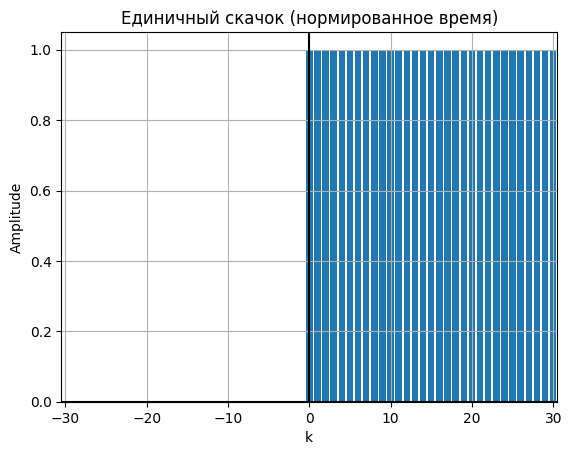

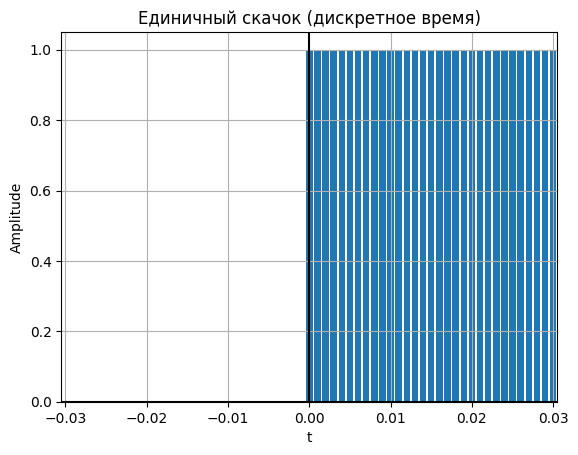

2) Единичный скачок σ_d[k]:
 - В дискретном виде: σ_d[k] = 1 для k >= 0, 0 для k < 0.
 - В непрерывном виде: u(t) = 1 для t >= 0.
 - Частота дискретизации f_s = 1/T = 1000.0 Гц.



In [4]:
plot_bar(step, "Единичный скачок (нормированное время)", k, "k")
plot_bar(step, "Единичный скачок (дискретное время)", t, "t")
plt.show()
# 2) Единичный скачок
print("2) Единичный скачок σ_d[k]:")
print(" - В дискретном виде: σ_d[k] = 1 для k >= 0, 0 для k < 0.")
print(" - В непрерывном виде: u(t) = 1 для t >= 0.")
print(" - Частота дискретизации f_s = 1/T =", 1/T, "Гц.\n")

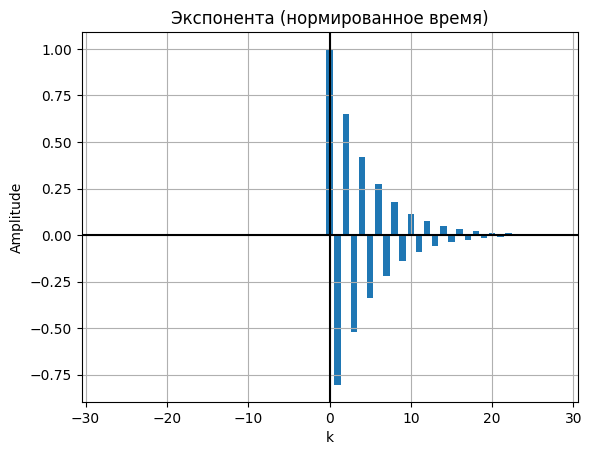

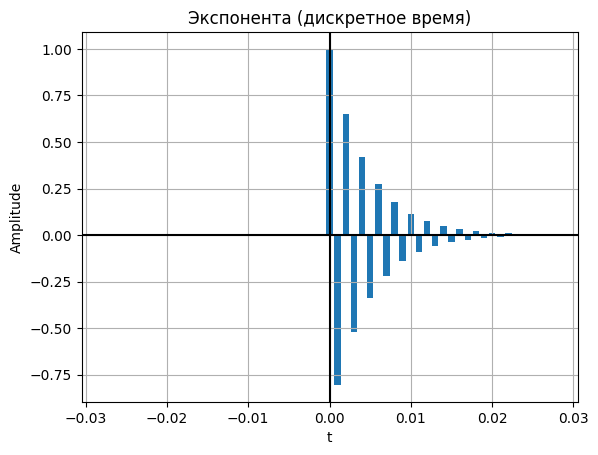

3) Дискретная экспонента:
 - Определена как s1[k] = a^k, где a = -0.805
 - Соответствие с аналоговой экспонентой: s(t) = exp(α t), при дискретизации t = kT получаем s1[k] = (exp(αT))^k.



In [5]:
plot_bar(s1, "Экспонента (нормированное время)", k, "k")
plot_bar(s1, "Экспонента (дискретное время)", t, "t")
plt.show()
# 3) Экспонента
print("3) Дискретная экспонента:")
print(" - Определена как s1[k] = a^k, где a =", a)
print(" - Соответствие с аналоговой экспонентой: s(t) = exp(α t), при дискретизации t = kT получаем s1[k] = (exp(αT))^k.\n")

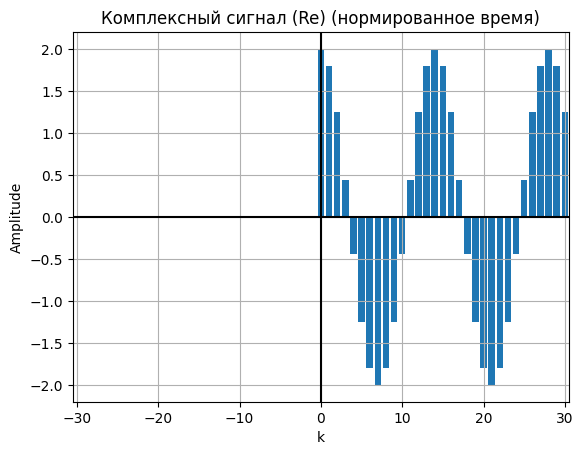

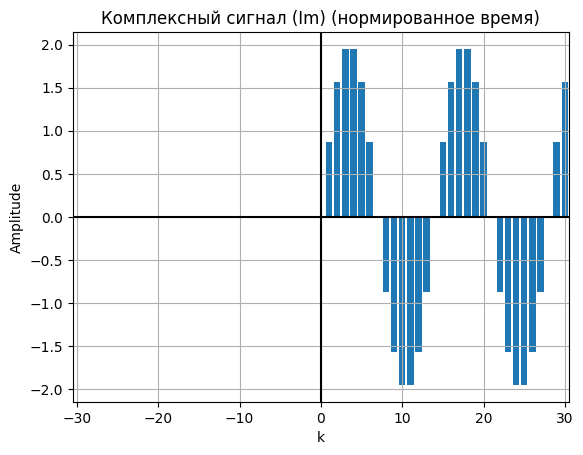

4) Комплексный гармонический сигнал:
 - Определение: s2[k] = C * exp(j ω0 k), где C = 2 , ω0 = 0.4487989505128276 рад/отсчет.
 - Его можно разложить на вещественную и мнимую части:
   Re{s2[k]} = C * cos(ω0 k)
   Im{s2[k]} = C * sin(ω0 k)



In [6]:
plot_bar(s2_real, "Комплексный сигнал (Re) (нормированное время)", k, "k")
plot_bar(s2_imag, "Комплексный сигнал (Im) (нормированное время)", k, "k")
plt.show()
# 4) Комплексный гармонический сигнал
print("4) Комплексный гармонический сигнал:")
print(" - Определение: s2[k] = C * exp(j ω0 k), где C =", C, ", ω0 =", omega0, "рад/отсчет.")
print(" - Его можно разложить на вещественную и мнимую части:")
print("   Re{s2[k]} = C * cos(ω0 k)")
print("   Im{s2[k]} = C * sin(ω0 k)\n")

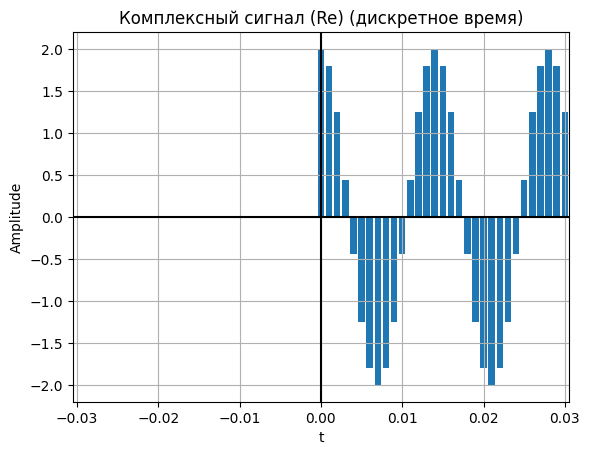

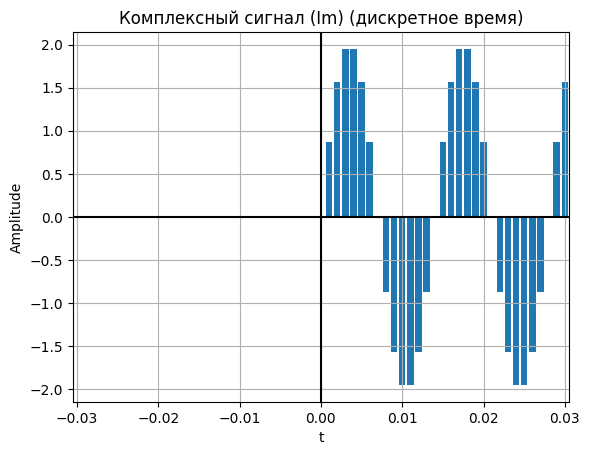

5) Задержка сигналов на m = 6 отсчетов:
 - δ_d[k-m]: импульс равен 1 при k=m, 0 иначе.
 - σ_d[k-m]: скачок равен 1 при k >= m.
 - s1[k-m]: экспонента сдвигается вправо на m точек.
 В физическом времени задержка соответствует сдвигу на m*T = 0.006 секунд.



In [7]:
plot_bar(s2_real, "Комплексный сигнал (Re) (дискретное время)", t, "t")
plot_bar(s2_imag, "Комплексный сигнал (Im) (дискретное время)", t, "t")
plt.show()
# 5) Задержка на m отсчетов
print("5) Задержка сигналов на m =", m, "отсчетов:")
print(" - δ_d[k-m]: импульс равен 1 при k=m, 0 иначе.")
print(" - σ_d[k-m]: скачок равен 1 при k >= m.")
print(" - s1[k-m]: экспонента сдвигается вправо на m точек.")
print(" В физическом времени задержка соответствует сдвигу на m*T =", m*T, "секунд.\n")

### Выводы  
В ходе выполнения лабораторной работы были смоделированы стандартные дискретные последовательности:
единичный цифровой импульс $\delta_d(k)$, единичный скачок $\sigma_d(k)$, экспоненциальная функция $s_1(k) = a^k$ и комплексный гармонический сигнал $s_2(k) = C e^{j \omega_0 k}$.
Была рассмотрена взаимосвязь между дискретным временем $nT$ и нормированным временем $n$, а также показаны отличия дискретных сигналов от их аналоговых прототипов.Комплексный гармонический сигнал был представлен в виде комбинации двух вещественных последовательностей — косинусной и синусной.Кроме того, были построены графики сигналов с задержкой на $m$ отсчётов для импульса, скачка и экспоненты.  
